In [2]:
%pylab inline
#Imports from standard packages
import pickle
from scipy.stats import spearmanr,linregress
from pandas import read_csv

#import from our moulin+subglacial conduit model
from subglacial_channel.simple_conduit_moulin_model import simple_sim


Populating the interactive namespace from numpy and matplotlib


### Comparison between observed oscillations and example simulations

In [3]:
#Read in moulin water level data
jeme_mou = read_csv('data/jeme.csv', index_col=0, parse_dates = True)
radi_mou = read_csv('data/radi.csv', index_col=0, parse_dates = True)

mean jeme = water_level_above_bed_fob    0.64445
dtype: float64
max jeme = water_level_above_bed_fob
min jeme = water_level_above_bed_fob
mean radi = water_level_above_bed_fob    0.712904
dtype: float64
max radi = water_level_above_bed_fob
min radi = water_level_above_bed_fob
Low camp osc_range= 0.1527523867527254
High camp osc_range= 0.029139693405040856


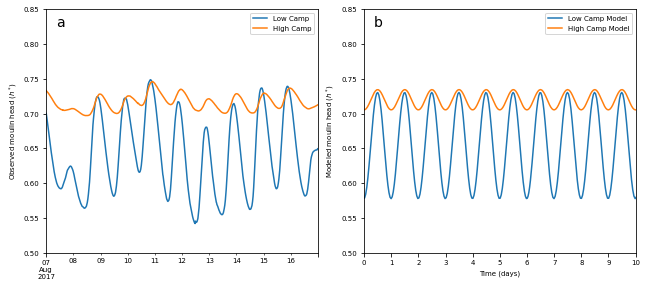

In [75]:
figure(figsize=(9,4))
subplot(121)

jeme_mou.water_level_above_bed_fob.plot()
radi_mou.water_level_above_bed_fob.plot()
ylim([0.5,0.85])
ylabel('Observed moulin head ($h^*$)')
xlabel('')
ax = gca()
text(0.035,0.93, 'a', fontsize=14, transform=ax.transAxes)

legend(['Low Camp','High Camp'])

print("mean jeme =",mean(jeme_mou['8-9-2017':'8-16-2017']))
print("max jeme =",max(jeme_mou['8-9-2017':'8-16-2017']))
print("min jeme =",min(jeme_mou['8-9-2017':'8-16-2017']))

print("mean radi =",mean(radi_mou['8-3-2017':'8-7-2017']))
print("max radi =",max(radi_mou['8-3-2017':'8-7-2017']))
print("min radi =",min(radi_mou['8-3-2017':'8-7-2017']))


#figure()
sim_params = {'R_func':'sin',
              'A':3e-24, 
              'overflow':True, 
              'f':0.075,
              'A_R':100,
              'R_mean':0.3,
              'R_min':0.05,
              'h_term':-150.,
              'L':25000.
             }
low_sim = simple_sim(camp='low', params=sim_params)
low_sim.run(run_params={'method':'LSODA','rtol':1e-8, 'atol':1e-8, 't_f':100})

osc_range = max(low_sim.sol.y[0][-500:]) - min(low_sim.sol.y[0][-500:])
print('Low camp osc_range=',str(osc_range))
ex_T1s=[low_sim.T1]
ex_T2s=[low_sim.T2]
ex_R_ratios=[(2*sim_params['R_mean']-sim_params['R_min'])/sim_params['R_min']]
ex_fs = [low_sim.tau_res/low_sim.params['R_period']]
ex_osc_ranges = [osc_range]



sim_params = {'R_func':'sin',
              'A':3e-24, 
              'overflow':True, 
              'f':0.075,
              'A_R':1500,
              'R_mean':3.,
              'R_min':2.,
              'h_term':200.,
              'L':15000.
             }
high_sim = simple_sim(camp='high', params=sim_params)
high_sim.run(run_params={'t_f':200 ,'method':'LSODA','rtol':1e-8, 'atol':1e-8})

osc_range = max(high_sim.sol.y[0][-500:]) - min(high_sim.sol.y[0][-500:])
print('High camp osc_range=',str(osc_range))
ex_T1s.append(high_sim.T1)
ex_T2s.append(high_sim.T2)
ex_R_ratios.append((2*sim_params['R_mean']-sim_params['R_min'])/sim_params['R_min'])
ex_fs.append(high_sim.tau_res/high_sim.params['R_period'])
ex_osc_ranges.append(osc_range)

subplot(122)
secs_per_day = 60*60*24
low_t = low_sim.sol.t*low_sim.tau_res/secs_per_day - 130
plot(low_t, low_sim.sol.y[0])
high_t = high_sim.sol.t*high_sim.tau_res/secs_per_day - 280
plot(high_t, high_sim.sol.y[0])

legend(['Low Camp Model','High Camp Model'])

xlim([0,10])
ylim([0.5,0.85])
ylabel('Modeled moulin head ($h^*$)')
xlabel('Time (days)')
ax = gca()
ax.xaxis.set_ticks([0,1,2,3,4,5,6,7,8,9,10])
text(0.035,0.93, 'b', fontsize=14, transform=ax.transAxes)
tight_layout()
savefig('Moulin-head-variations.png',dpi=300)


Max T1s =  0.297406554725475
Min T1s =  -4.003623440938506
Max T2s =  2.3609321835878614
Min T2s =  -2.3380378207481574


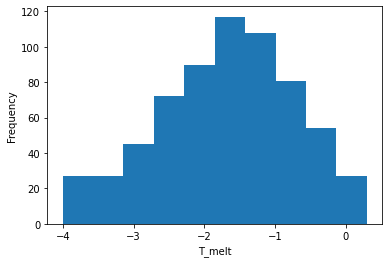

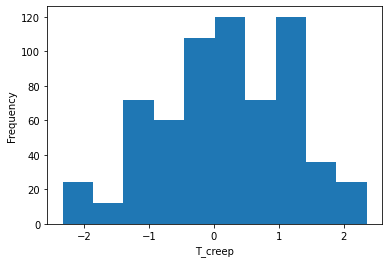

In [42]:
#Dimensionless param ranges for high camp
fs=[0.01,0.1,1,10,100]#DW-friction factor
R_means = [1.,5.,10.]
R_factors = [0.1,0.33,0.66]
A_glens = [4e-25, 2e-24, 1e-23]
T1s = []
T2s = []
A_Rs=[10.,100.,200.,500,1000,2000] #moulin surface area (m^2)
for A_glen in A_glens:
    for A_R in A_Rs:
        for f in fs:
            for R in R_means:
                for R_factor in R_factors:
                    params = {}
                    params['A'] = A_glen
                    params['A_R'] = A_R
                    params['f'] = f
                    params['R_func'] = 'sin'
                    params['R_mean'] = R
                    this_sim = simple_sim(params, camp='high')
                    #this_sim.params = params
                    #t_f = this_sim.damping*params['Equil_damping_times'] + 20.*secs_per_day/this_sim.tau_res
                    #T1 = this_sim.
                    T1s.append(this_sim.T1)
                    T2s.append(this_sim.T2)
hist(log10(T1s))
xlabel('T_melt')
ylabel('Frequency')
figure()
hist(log10(T2s))
xlabel('T_creep')
ylabel('Frequency')

print("Max T1s = ",str(max(log10(T1s))))
print("Min T1s = ",str(min(log10(T1s))))
print("Max T2s = ",str(max(log10(T2s))))
print("Min T2s = ",str(min(log10(T2s))))

Max T1s =  0.6572875185606027
Min T1s =  -4.043742477103378
Max T2s =  1.7764200408749091
Min T2s =  -2.9225499634611096
Max tau_res =  910000.0
Min tau_res =  455.0


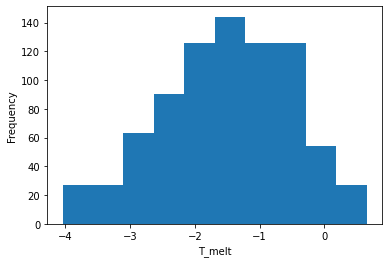

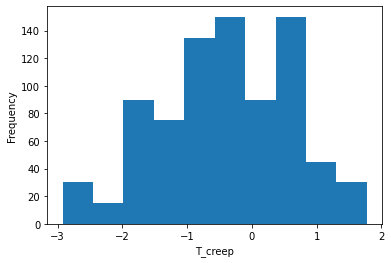

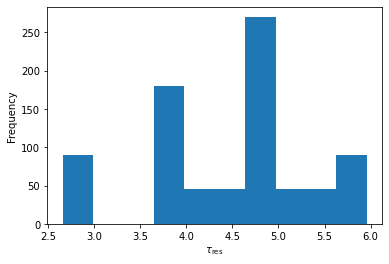

In [69]:
#Dimensionless param ranges for high camp
fs=[0.01,0.1,1,10,100]#DW-friction factor
R_means = [1.,5.,10.]
R_factors = [0.1,0.33,0.66]
A_glens = [4e-25, 2e-24, 1e-23]
T1s = []
T2s = []
tau_stors = []
A_Rs=[10.,100.,200.,500,1000,2000] #moulin surface area (m^2)
for A_glen in A_glens:
    for A_R in A_Rs:
        for f in fs:
            for R in R_means:
                for R_factor in R_factors:
                    params = {}
                    params['A'] = A_glen
                    params['A_R'] = A_R
                    params['f'] = f
                    params['R_func'] = 'sin'
                    params['R_mean'] = R
                    this_sim = simple_sim(params, camp='low')
                    #this_sim.params = params
                    T1s.append(this_sim.T1)
                    T2s.append(this_sim.T2)
                    tau_stors.append(this_sim.tau_res)
hist(log10(T1s))
xlabel('T_melt')
ylabel('Frequency')
figure()
hist(log10(T2s))
xlabel('T_creep')
ylabel('Frequency')
figure()
hist(log10(tau_stors))
xlabel(r'$\tau_{\rm res}$')
ylabel('Frequency')


print("Max T1s = ",str(max(log10(T1s))))
print("Min T1s = ",str(min(log10(T1s))))
print("Max T2s = ",str(max(log10(T2s))))
print("Min T2s = ",str(min(log10(T2s))))
print("Max tau_res = ",str(max((tau_stors))))
print("Min tau_res = ",str(min((tau_stors))))


In [65]:
#Constants
rho_i = 900.
rho_w = 1000.
g = 9.8

A_R_max = max(A_Rs)
A_R_min = min(A_Rs)
Z_max = 700.
Z_min = 500.
R_mean_max = max(R_means)
R_mean_min = min(R_means)

#R ratio 
print('R_ratio')
print('max=',1.95/0.05)
print('min=',1.2/0.8)

#R_period
print('R_period')
secs_per_day = 60.*60.*24.
P = secs_per_day
tau_stor_max = 10**6.
print('tau_stor_max='+str(tau_stor_max))
tau_stor_min = 10**3.5
print('tau_stor_min='+str(tau_stor_min))
print('R_period_max = '+str(P/tau_stor_min), '   f_min=',str(tau_stor_min/P))
print('R_period_min = '+str(P/tau_stor_max), '   f_max=',str(tau_stor_max/P))

R_ratio
max= 39.0
min= 1.4999999999999998
R_period
tau_stor_max=1000000.0
tau_stor_min=3162.2776601683795
R_period_max = 27.322078983854794    f_min= 0.036600435881578464
R_period_min = 0.0864    f_max= 11.574074074074074


In [66]:
#use bracketing values of f=0.03 and f=12
print('R_period_max =', 1./0.03)
print('R_period_min = ', 1./12)


R_period_max = 33.333333333333336
R_period_min =  0.08333333333333333


In [71]:
#Determined from histograms of parameter searches near camps
log_T1_min = -4.
log_T1_max = 0.5

log_T2_min = -3.
log_T2_max = 2.5

R_min_min = 0.05
R_min_max = 0.8
R_period_min = 0.083
R_period_max = 33


N_sims = 500
T1s = zeros(N_sims)
T2s = zeros(N_sims)
R_mins = zeros(N_sims)
R_periods = zeros(N_sims)
Results = zeros(N_sims,dtype=object)
osc_ranges = zeros(N_sims)
has_overflowed = zeros(N_sims, dtype=bool)
alphas = zeros(N_sims)

simnum = 0
np.random.seed(0)
while (simnum < N_sims):
    #Randomly chose dimensionless parameters
    log_T1 = (log_T1_max - log_T1_min)*np.random.rand() + log_T1_min
    log_T2 = (log_T2_max - log_T2_min)*np.random.rand() + log_T2_min
    log_R_period = (log10(R_period_max) - log10(R_period_min))*np.random.rand() + log10(R_period_min)
    T1 = 10.**log_T1
    T2 = 10.**log_T2
    R_min = (R_min_max - R_min_min)*np.random.rand() + R_min_min
    R_period = 10**log_R_period#(R_period_max - R_period_min)*np.random.rand() + R_period_min
    sim = simple_sim(params={'T1':T1,'T2':T2, 'R_func':'sin', 'R_min':R_min, 'R_period':R_period})
    #Check whether sim is stable. Only run stable cases.
    if sim.alpha<0:
        max_step = R_period/50.#0.05
        t_f_min = 50
        min_days=20
        if t_f_min<min_days*R_period:
            t_f = min_days*R_period
        else:
            t_f = t_f_min
                
        print("Running sim number: ",simnum)
        res = sim.run(run_params={'S_0':sim.S_eq, 
                                  'h_0':sim.h_eq,
                                  't_f':t_f,
                                  'Equil_damping_times':1,
                                  'max_step':max_step}
                     )
        if res['status']==0:#Check whether simulation ran correctly
            T1s[simnum] = T1
            T2s[simnum] = T2
            R_mins[simnum] = R_min
            R_periods[simnum] = R_period
            Results[simnum] = res
            alphas[simnum] = sim.alpha
            #Calculate oscilation range near end of sim
            t = sim.sol.t
            t_end = t[-1]
            n_osc_days = 5
            t_start_osc_meas = t_end - n_osc_days*R_period#Last 5 osc periods
            h = sim.sol.y[0]
            h_last = h[t>t_start_osc_meas]#h[t>45]#Runs to 50. 45-50 seems to capture last few oscillations
            osc_range = h_last.max() - h_last.min()
            osc_ranges[simnum] = osc_range
            #Check whether we have the right number of large oscillations in the final period
            h_minus_mean = h_last - mean(h_last)
            n_roots = sum(h_minus_mean[:-1]*h_minus_mean[1:]<0)
            dh_last_dt = h_last[:-1] - h_last[1:]#Check for changes in positive and neg difs
            n_peaks = sum(dh_last_dt[:-1]*dh_last_dt[1:]<0)
            #print('n_peaks=',str(n_peaks), '  n_roots=',str(n_roots) )
            #Check whether water level has gone over floatation
            if h_last.max()>1:
                has_overflowed[simnum] = True
            #Only keep cases with no nans and correct number of roots
            if not np.isnan(osc_range) and n_peaks==2*n_osc_days:
                ts_filename = './nd-controls-ts/ts-plot-'+str(simnum)+'.png'
                phase_filename = './nd-controls-phase/phase-plot-'+str(simnum)+'.png'
                sim.plot_sim(filename=ts_filename,close_plots=True,tmin=t_start_osc_meas)
                sim.plot_phase(filename=phase_filename, close_plots=True)
                simnum += 1


Running sim number:  0
Running sim number:  1
Running sim number:  2
Running sim number:  3
Running sim number:  4
Running sim number:  5
Running sim number:  5
Running sim number:  6
Running sim number:  7
Running sim number:  8
Running sim number:  9
Running sim number:  10
Running sim number:  11
Running sim number:  12
Running sim number:  13
Running sim number:  14
Running sim number:  15
Running sim number:  16
Running sim number:  16
Running sim number:  16


/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less


Running sim number:  17
Running sim number:  18
Running sim number:  19
Running sim number:  19
Running sim number:  20


/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less


Running sim number:  20
Running sim number:  21
Running sim number:  22
Running sim number:  23
Running sim number:  24
Running sim number:  25
Running sim number:  25
Running sim number:  26
Running sim number:  27
Running sim number:  28
Running sim number:  29
Running sim number:  30
Running sim number:  31
Running sim number:  32
Running sim number:  33
Running sim number:  34
Running sim number:  35
Running sim number:  35
Running sim number:  36
Running sim number:  37
Running sim number:  37
Running sim number:  38
Running sim number:  38
Running sim number:  39
Running sim number:  39
Running sim number:  40
Running sim number:  41
Running sim number:  42
Running sim number:  42
Running sim number:  43
Running sim number:  44
Running sim number:  45
Running sim number:  45
Running sim number:  46
Running sim number:  47
Running sim number:  48
Running sim number:  49
Running sim number:  50
Running sim number:  51
Running sim number:  51
Running sim number:  51
Running sim numb

/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less


Running sim number:  61
Running sim number:  62
Running sim number:  63
Running sim number:  64
Running sim number:  65
Running sim number:  66
Running sim number:  67
Running sim number:  68
Running sim number:  68
Running sim number:  69
Running sim number:  70
Running sim number:  71
Running sim number:  72
Running sim number:  72
Running sim number:  73
Running sim number:  74
Running sim number:  75
Running sim number:  75
Running sim number:  76
Running sim number:  77
Running sim number:  78
Running sim number:  79
Running sim number:  80
Running sim number:  81
Running sim number:  82
Running sim number:  83
Running sim number:  83
Running sim number:  83
Running sim number:  84
Running sim number:  85
Running sim number:  86
Running sim number:  86
Running sim number:  87
Running sim number:  87
Running sim number:  88
Running sim number:  89
Running sim number:  90
Running sim number:  91
Running sim number:  92
Running sim number:  92
Running sim number:  92
Running sim numb

/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less


Running sim number:  108
Running sim number:  109
Running sim number:  110
Running sim number:  111
Running sim number:  112
Running sim number:  112
Running sim number:  113
Running sim number:  114
Running sim number:  115
Running sim number:  116
Running sim number:  116
Running sim number:  117
Running sim number:  118
Running sim number:  119
Running sim number:  120
Running sim number:  121
Running sim number:  122
Running sim number:  123
Running sim number:  124
Running sim number:  124
Running sim number:  125
Running sim number:  126
Running sim number:  127
Running sim number:  127
Running sim number:  128
Running sim number:  129
Running sim number:  130
Running sim number:  131
Running sim number:  131
Running sim number:  132
Running sim number:  133
Running sim number:  133


/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less


Running sim number:  134
Running sim number:  135
Running sim number:  136


/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less


Running sim number:  136
Running sim number:  137
Running sim number:  138
Running sim number:  139
Running sim number:  140
Running sim number:  141
Running sim number:  142
Running sim number:  143
Running sim number:  144
Running sim number:  145
Running sim number:  146
Running sim number:  147
Running sim number:  148
Running sim number:  149
Running sim number:  150
Running sim number:  151
Running sim number:  152
Running sim number:  153
Running sim number:  154
Running sim number:  154
Running sim number:  154
Running sim number:  155
Running sim number:  156
Running sim number:  157
Running sim number:  158
Running sim number:  159
Running sim number:  160
Running sim number:  161
Running sim number:  162
Running sim number:  162
Running sim number:  163
Running sim number:  164
Running sim number:  165
Running sim number:  166
Running sim number:  167
Running sim number:  168
Running sim number:  168
Running sim number:  169
Running sim number:  170
Running sim number:  170


/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5
/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:221: RuntimeWarning: invalid value encountered in double_scalars
  dS_dt = self.T1*S**(5./4.)*np.abs((h-self.h_term_nd))**(3./2.) - self.T2*S*(1.-h)**3.
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less


Running sim number:  200
Running sim number:  200
Running sim number:  201
Running sim number:  202
Running sim number:  203
Running sim number:  204
Running sim number:  204
Running sim number:  204
Running sim number:  205
Running sim number:  206
Running sim number:  207
Running sim number:  208
Running sim number:  209
Running sim number:  209
Running sim number:  210
Running sim number:  211
Running sim number:  212
Running sim number:  213
Running sim number:  213
Running sim number:  214
Running sim number:  215
Running sim number:  216
Running sim number:  217
Running sim number:  217
Running sim number:  218
Running sim number:  218
Running sim number:  219
Running sim number:  220
Running sim number:  221
Running sim number:  221
Running sim number:  221
Running sim number:  222
Running sim number:  223
Running sim number:  224
Running sim number:  225
Running sim number:  226
Running sim number:  227
Running sim number:  228
Running sim number:  229
Running sim number:  230


/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less


Running sim number:  240
Running sim number:  240
Running sim number:  241
Running sim number:  242
Running sim number:  243
Running sim number:  244
Running sim number:  245
Running sim number:  246
Running sim number:  247
Running sim number:  247
Running sim number:  248
Running sim number:  249
Running sim number:  249
Running sim number:  250
Running sim number:  251
Running sim number:  252
Running sim number:  253
Running sim number:  253
Running sim number:  254
Running sim number:  255
Running sim number:  255


/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less


Running sim number:  256
Running sim number:  256
Running sim number:  256
Running sim number:  257
Running sim number:  257
Running sim number:  258
Running sim number:  258
Running sim number:  259
Running sim number:  260
Running sim number:  261
Running sim number:  262
Running sim number:  263
Running sim number:  264
Running sim number:  265
Running sim number:  266
Running sim number:  267
Running sim number:  267
Running sim number:  268
Running sim number:  269
Running sim number:  270
Running sim number:  271
Running sim number:  272
Running sim number:  273
Running sim number:  273
Running sim number:  273
Running sim number:  274
Running sim number:  274
Running sim number:  275
Running sim number:  276
Running sim number:  276
Running sim number:  277
Running sim number:  278
Running sim number:  279
Running sim number:  280
Running sim number:  280
Running sim number:  281
Running sim number:  282
Running sim number:  282
Running sim number:  283
Running sim number:  283


/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less


Running sim number:  311
Running sim number:  312
Running sim number:  313
Running sim number:  314
Running sim number:  315
Running sim number:  316
Running sim number:  317
Running sim number:  318
Running sim number:  318
Running sim number:  319
Running sim number:  320
Running sim number:  321
Running sim number:  322
Running sim number:  323
Running sim number:  324
Running sim number:  325
Running sim number:  326
Running sim number:  326
Running sim number:  327
Running sim number:  327
Running sim number:  328
Running sim number:  329
Running sim number:  329
Running sim number:  330
Running sim number:  331
Running sim number:  332
Running sim number:  333
Running sim number:  334
Running sim number:  335
Running sim number:  336
Running sim number:  337
Running sim number:  337
Running sim number:  338
Running sim number:  339
Running sim number:  340
Running sim number:  341
Running sim number:  342
Running sim number:  343
Running sim number:  343
Running sim number:  344


/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less


Running sim number:  347
Running sim number:  347
Running sim number:  348


/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less


Running sim number:  348
Running sim number:  348


/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less


Running sim number:  349
Running sim number:  349
Running sim number:  349
Running sim number:  350
Running sim number:  350
Running sim number:  350
Running sim number:  351
Running sim number:  351
Running sim number:  352
Running sim number:  352
Running sim number:  352
Running sim number:  353
Running sim number:  354
Running sim number:  354
Running sim number:  355
Running sim number:  356
Running sim number:  357
Running sim number:  358
Running sim number:  359
Running sim number:  360
Running sim number:  361
Running sim number:  362
Running sim number:  363
Running sim number:  364
Running sim number:  364
Running sim number:  364
Running sim number:  365
Running sim number:  366
Running sim number:  367
Running sim number:  368
Running sim number:  369
Running sim number:  370
Running sim number:  371
Running sim number:  372
Running sim number:  373
Running sim number:  374
Running sim number:  374
Running sim number:  375
Running sim number:  376
Running sim number:  376


/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less


Running sim number:  378
Running sim number:  378
Running sim number:  379
Running sim number:  380
Running sim number:  381
Running sim number:  382
Running sim number:  383
Running sim number:  384
Running sim number:  385
Running sim number:  386
Running sim number:  387
Running sim number:  388
Running sim number:  389
Running sim number:  390
Running sim number:  391
Running sim number:  392
Running sim number:  392
Running sim number:  393
Running sim number:  393
Running sim number:  393
Running sim number:  393


/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less


Running sim number:  394
Running sim number:  395
Running sim number:  396
Running sim number:  397
Running sim number:  398
Running sim number:  399
Running sim number:  400
Running sim number:  400
Running sim number:  401
Running sim number:  402
Running sim number:  403
Running sim number:  404
Running sim number:  405
Running sim number:  406
Running sim number:  407
Running sim number:  408
Running sim number:  409
Running sim number:  409
Running sim number:  410
Running sim number:  411
Running sim number:  411
Running sim number:  412
Running sim number:  413
Running sim number:  414
Running sim number:  415
Running sim number:  416
Running sim number:  417
Running sim number:  418
Running sim number:  419
Running sim number:  420
Running sim number:  421
Running sim number:  421
Running sim number:  421
Running sim number:  421
Running sim number:  421


/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less


Running sim number:  422
Running sim number:  423
Running sim number:  424
Running sim number:  425
Running sim number:  425
Running sim number:  426
Running sim number:  427
Running sim number:  428
Running sim number:  428
Running sim number:  429
Running sim number:  430
Running sim number:  431
Running sim number:  432
Running sim number:  432
Running sim number:  433
Running sim number:  433
Running sim number:  434
Running sim number:  435
Running sim number:  436
Running sim number:  437
Running sim number:  438
Running sim number:  438
Running sim number:  439
Running sim number:  439
Running sim number:  440
Running sim number:  441
Running sim number:  441
Running sim number:  441
Running sim number:  442
Running sim number:  442


/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/subglacial_channel/simple_conduit_moulin_model.py:220: RuntimeWarning: invalid value encountered in double_scalars
  dh_dt = self.R_func(t)/self.params['R_mean'] - S**(5./4.)*h**.5


Running sim number:  443
Running sim number:  443


/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in less
/home/mcoving/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in less


Running sim number:  444
Running sim number:  445
Running sim number:  446
Running sim number:  447
Running sim number:  448
Running sim number:  449
Running sim number:  450
Running sim number:  451
Running sim number:  451
Running sim number:  452
Running sim number:  452
Running sim number:  453
Running sim number:  454
Running sim number:  455
Running sim number:  456
Running sim number:  457
Running sim number:  458
Running sim number:  459
Running sim number:  460
Running sim number:  461
Running sim number:  462
Running sim number:  463
Running sim number:  464
Running sim number:  465
Running sim number:  466
Running sim number:  467
Running sim number:  467
Running sim number:  468
Running sim number:  469
Running sim number:  470
Running sim number:  470
Running sim number:  471
Running sim number:  472
Running sim number:  473
Running sim number:  474
Running sim number:  475
Running sim number:  476
Running sim number:  477
Running sim number:  478
Running sim number:  479


rho R_ratios = 0.13411013644054576    p= 0.0026569168371956653
slope= -0.9353116223455024


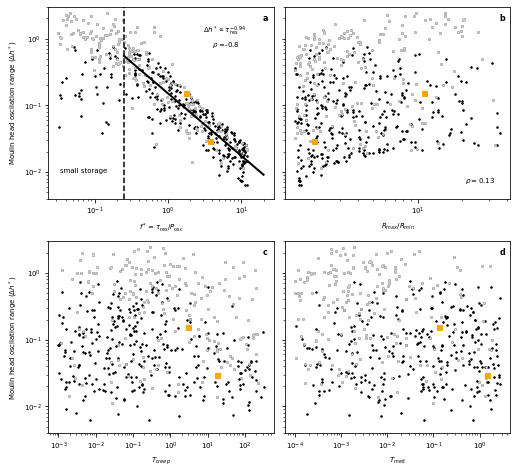

In [76]:
figure(figsize=(7.2,6.6))
subplot(2,2,4)
rcParams['font.size']=7

loglog(T1s,osc_ranges,'k.',ms=3)
plot(T1s[has_overflowed],osc_ranges[has_overflowed],'.',color='lightgrey',ms=3)
plot(ex_T1s, ex_osc_ranges, 's',color='orange',ms=5)
xlabel(r'$T_{melt}$')#, fontsize=12)
ylim([0.004,3])
ax = gca()
ax.set_yticklabels([' '])
text(0.95,0.93,'d',fontsize=8, weight='bold',transform=ax.transAxes)


#savefig('T_melt_osc_range.png',dpi=72)

subplot(2,2,3)
#figure(figsize=(5.5,4.8))
loglog(T2s,osc_ranges,'.k',ms=3)
plot(T2s[has_overflowed],osc_ranges[has_overflowed],'.', color='lightgrey',ms=3)
#plot(T2s[1./R_periods<0.3],osc_ranges[1./R_periods<0.3],'.')
plot(ex_T2s, ex_osc_ranges,  's',color='orange',ms=5)
xlabel(r'$T_{creep}$')#, fontsize=12)
#ylabel('Oscilation range')
ylabel(r'Moulin head oscilation range ($\Delta h^*$)')#, fontsize=12)
ylim([0.004,3])
#savefig('T_creep_osc_range.png',dpi=72)
ax = gca()
text(0.95,0.93,'c',fontsize=8, weight='bold',transform=ax.transAxes)


###Looks the same, but inverted, and harder to interpret meaning
#figure()
#loglog(R_mins,osc_ranges,'.k')
#plot(R_mins[has_overflowed],osc_ranges[has_overflowed],'.',color='lightgrey')



subplot(2,2,2)
#figure(figsize=(5.5,4.8))
R_maxs = 2. - R_mins
R_ratios = R_maxs/R_mins
loglog(R_ratios,osc_ranges,'.k',ms=3)
plot(R_ratios[has_overflowed],osc_ranges[has_overflowed],'.',color='lightgrey',ms=3)
#plot(R_ratios[1./R_periods<0.3],osc_ranges[1./R_periods<0.3],'.')
plot(ex_R_ratios, ex_osc_ranges,  's',color='orange',ms=5)

rho,p = spearmanr(R_ratios,osc_ranges)
print('rho R_ratios =',rho, '   p=',p)
text(21,0.007, r"$\rho =$"+str(rho)[0:4])#, fontsize=14)
xlabel(r'$R_{max}/R_{min}$')#, fontsize=12)
#ylabel(r'Moulin head oscilation range ($\Delta h^*$)', fontsize=12)
ylim([0.004,3])
ax = gca()
ax.set_yticklabels([' '])
#savefig('R_ratio_osc_range.png',dpi=72)
text(0.95,0.93,'b',fontsize=8, weight='bold',transform=ax.transAxes)



subplot(2,2,1)
#figure(figsize=(5.5,4.8))
loglog(1./R_periods,osc_ranges,'.k', ms=3)
loglog(1./R_periods[has_overflowed],osc_ranges[has_overflowed],'.',color='lightgrey',ms=3)
plot(ex_fs, ex_osc_ranges, 's',color='orange',ms=5)

rho,p = spearmanr(1./R_periods,osc_ranges)
m,b,r,p,err = linregress(log10(1./R_periods)[1./R_periods>0.25], 
                         log10(osc_ranges)[1./R_periods>0.25])
xplot = array([1./0.05,0.25])
yplot = 10**b*xplot**m
plot(xplot,yplot, 'k',lw=2)
plot([0.25,0.25],[0.004,3],'--k')
print('slope=',m)
text(4.,0.75, r"$\rho$ ="+str(rho)[0:4],fontsize=7)
text(3, 1.2, r'$\Delta h^* \propto \tau_{\rm res}^{-0.94}$', fontsize=7)
xlabel(r'$f^* = \tau_{\rm res}/P_{\rm osc}$', fontsize=7)
ylabel(r'Moulin head oscilation range ($\Delta h^*$)', fontsize=7)
#xlim([0,1.1])
ylim([0.004,3])
text(.034,.01, 'small storage',fontsize=7)
ax = gca()
text(0.95,0.93,'a',fontsize=8, weight='bold',transform=ax.transAxes)
tight_layout()
savefig('Sensitivity-composite-fig.png',dpi=300)


rho_small= 0.6386569299354582


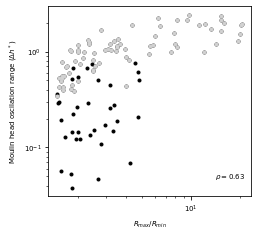

In [77]:
figure(figsize=(3.6,3.3))
small_fs = 1./R_periods<0.25
loglog(R_ratios[small_fs],osc_ranges[small_fs],'.k')
loglog(R_ratios[logical_and(small_fs,has_overflowed)],osc_ranges[logical_and(small_fs,has_overflowed)],'.',color='lightgrey')

rho_small,p_small = spearmanr(R_ratios[small_fs],osc_ranges[small_fs])
print('rho_small=',rho_small)
text(14,0.008*6, r"$\rho =$"+str(rho_small)[0:4], fontsize=7)
xlabel(r'$R_{max}/R_{min}$', fontsize=7)
#ylabel('O2scilation range')
ylabel(r'Moulin head oscilation range ($\Delta h^*$)',fontsize=7)
tight_layout()
savefig('R_ratio_small_f_osc_range.png',dpi=300)


slope= -0.9353116223455024


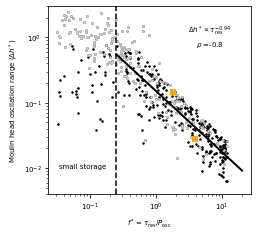

In [78]:
figure(figsize=(3.6,3.3))
loglog(1./R_periods,osc_ranges,'.k', ms=3)
loglog(1./R_periods[has_overflowed],osc_ranges[has_overflowed],'.',color='lightgrey',ms=3)
plot(ex_fs, ex_osc_ranges, 's',color='orange',ms=5)

rho,p = spearmanr(1./R_periods,osc_ranges)
m,b,r,p,err = linregress(log10(1./R_periods)[1./R_periods>0.25], 
                         log10(osc_ranges)[1./R_periods>0.25])
xplot = array([1./0.05,0.25])
yplot = 10**b*xplot**m
plot(xplot,yplot, 'k',lw=2)
plot([0.25,0.25],[0.004,3],'--k')
print('slope=',m)
text(4.,0.75, r"$\rho$ ="+str(rho)[0:4],fontsize=7)
text(3, 1.2, r'$\Delta h^* \propto \tau_{\rm res}^{-0.94}$', fontsize=7)
xlabel(r'$f^* = \tau_{\rm res}/P_{\rm osc}$', fontsize=7)
ylabel(r'Moulin head oscilation range ($\Delta h^*$)', fontsize=7)
#xlim([0,1.1])
ylim([0.004,3])
text(.034,.01, 'small storage',fontsize=7)
ax = gca()
#text(0.95,0.93,'a',fontsize=8, weight='bold',transform=ax.transAxes)
tight_layout()
savefig('f_star-osc-range.png',dpi=300)
